# Descriptive Statistics Review

## Before you start:

- Read the README.md file
- Comment as much as you can
- Happy learning!

## Context

![img](./diamonds.jpg)

In this lab we are going to work with data to understand the characteristics of a diamond that are most likely to influence its price. In this first part of the lab, we will explore and clean our data. 

The dataset we will be using is comprised of approximately 54k rows and 11 different columns. As always, a row represents a single observation (in this case a diamond) and each of the columns represent a different feature of a diamond.

The following codebook was provided together with the dataset to clarify what each column represents:


| Column  | Description  |
|---|---|
| Price  | Price in US dollars (326-18,823)  |
| Carat  | Weight of the diamond (0.2--5.01)  |
| Cut  | Quality of the cut (Fair, Good, Very Good, Premium, Ideal)  |
| Color  | Diamond colour, from J (worst) to D (best)  |
| Clarity  | A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))   |
| x  | Length in mm (0--10.74)  |
| y  | Width in mm (0--58.9)  |
| z  | Depth in mm (0--31.8)  |
| Depth  | Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)  |
| Table  | Width of top of diamond relative to widest point (43--95)  |

## Libraries
Pandas and numpy will be needed for the analysis of the data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

First import the data from the .csv file provided and assign it to a variable named `diamonds` and drop the column with the index.

In [2]:
diamonds = pd.read_csv('diamonds.csv', index_col = 0)

# 1. Taking the first look at the data.
Let's see how the data looks by using pandas methods like `head()`, `info()` and `describe()`. 

**First, use the `head` method.**

In [3]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


We can see the first 5 rows of the dataset using the `head` method. This by itself doesn't tell us much about the data that we have, but we can have a first look at the features (columns) and some of the values that each one takes.

**What do you see? Make some comments about the values you see in each column, comparing them with the codebook. Is that what you would expect for these variables?**

It is very important to know the amount of data we have, because everything will depend on that, from the quality of the analysis to the choice of our infrastracture.

**Check the shape of the data**

In [4]:
diamonds.shape

(53940, 10)

The `clarity` column is confusing because we are not diamond experts. Let's modify this column with a new scale that is more understandable for us.

**Modify `clarity` column with numbers from 0 to 7. The lowest would be 0 with value `I1` and the greatest 7 with value `IF`**

In [5]:
Clarity_numbered = diamonds.replace(['I1'], '0').replace(['SI2'], '1').replace(['SI1'], '2').replace(['VS2'], '3').replace(['VS1'], '4').replace(['VVS2'], '5').replace(['VVS1'], '6').replace(['IF'], '7')

It makes sense to do the same with the `color` column.

**Do the same with values from 0 to 6. Read the codebook to see the match**

In [6]:
Color_numbered = Clarity_numbered.replace("J", "0").replace("I", "1").replace("H", "2").replace("G", "3").replace("F", "4").replace("E", "5").replace("D", "6")

In [7]:
Cut_numbered = Color_numbered.replace("Fair", "0").replace("Very Good", "1").replace("Good", "2").replace("Premium", "3").replace("Ideal", "4")
Cut_numbered.head()  

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
2,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
3,0.23,2,5,4,56.9,65.0,327,4.05,4.07,2.31
4,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
5,0.31,2,0,1,63.3,58.0,335,4.34,4.35,2.75


With the `info` method, we can see the features of the dataset, and the amount of observations (rows) that have a non-null value and the types of the features. 

**Now use the `info` method and comparing with the shape, comment on what you see**

In [8]:
Cut_numbered.info()
"""I see that there are no 0-values"""

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


'I see that there are no 0-values'

In the last line of the info output, you have some information about the types of the columns. As you know, it is a good idea to check if the types of each column is what you expect. If a column has the right type, we will be able to do all the operations that we want to do. 

For instance, if we have a column that is a `date` with a `string` format, we will have the data but we won't be able to do a simple operation, such as format the date the way that we would like.

Changing the data type to the one we needs can help us to solve a lot of problems in our data.

**Check the types of each column and comment if it matches with the expected**

In [9]:
Cut_numbered['cut'] = Cut_numbered['cut'].astype('int64') 
Cut_numbered['color'] = Cut_numbered['color'].astype('int64') 
Cut_numbered['clarity'] = Cut_numbered['clarity'].astype('int64') 


# 2. A deeper look: checking the basic statistics.

The `describe` method gives us an overview of our data. From here we can see all the descriptive metrics for our variables.

**Use the `describe` method and comment on what you see**

In [10]:
Cut_numbered.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,2.771060,3.405803,3.051020,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.265976,1.701105,1.647136,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,1.000000,2.000000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,3.000000,3.000000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,4.000000,5.000000,4.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


You have probably noticed that the columns x, y and z have a minimum value of 0. This means that there are one or more rows (or observations) in our dataset that are supposedly representing a diamond that has lenght, width or depth of 0. Considering that we're talking about a physical object, this is impossible!

Now let's proceed to check the rows that have a value of 0 in any of the x, y or z columns. By doing this we want to check if the data we are missing can be obtained using the data that we do have.

**Check the columns with `x`, `y` and `z` with value 0 in all of them and comment what you see**

In [11]:
"""for Price I see that there is a big difference between the mean and the median, further it has a big standard deviation
furthermore some Diamonds are for free will the minum is 0. 
Also at x, y and z there are some values missing. """

'for Price I see that there is a big difference between the mean and the median, further it has a big standard deviation\nfurthermore some Diamonds are for free will the minum is 0. \nAlso at x, y and z there are some values missing. '

As you can see, we have 20 rows that have a value of 0 in some or all the aforementioned columns.
Most of them (12) are missing the z value, which we can obtain using the columns depth, x and y. 

20 rows with issues represent just 0.03% of our data (20 out of 53940) so it wouldn't be a big deal to remove them. Still, lets try to keep all the data we have. 

For those 12 rows, we will create a function that applies the formula given in the codebook and get the value of z.

**Create a function named `calculate_z` that applies the function in the codebook to one single row you give to the function**

In [13]:
Cut_numbered.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [14]:
rows_to_fill = Cut_numbered[(Cut_numbered['z'] == 0) & (Cut_numbered['y'] != 0) & (Cut_numbered['x'] != 0)]
def calculate_z(row):
    change = rows_to_fill
    ((change.iloc[:,8] + change.iloc[:,9]) /2) / (change.iloc[:,5]/100) 
    return ['z']

In [54]:
filled_rows = [calculate_z(x) for x in rows_to_fill.index]
dict_z = dict(zip(rows_to_fill.index, filled_rows))

Cut_numbered['z'].update(pd.Series(dict_z))
Cut_numbered

If we leave the other 8 values as they are, it would negatively affect our analysis, because these are data that do not make logical sense. Therefore it is better to consider those values as NaN values, since they are probably the result of a mistake or error during process of measuring and storing these values in a dataset.

To replace them we can use the pandas .replace() method and np.NaN.

**Replace the zero values in the `z` column for a NaN**

**Apply it just to the rows with incorrect values**

In [55]:
Cut_numbered.loc[Cut_numbered['z'] == 0,'z'] = np.nan

AttributeError: 'NoneType' object has no attribute 'loc'

Let's check the data again with the `describe()` method.

In [56]:
Cut_numbered.describe()

AttributeError: 'NoneType' object has no attribute 'describe'

The minimum value for x, y and z should now be a positive number, as it should be for the physical measurements of an object.

Let's finish by checking for NaN values in the data. Since we introduced them ourselves using 'replace', we will surely find some, but there may be more that are unrelated to the x, y and z columns. Checking NaNs is a fundamental part of data cleaning and it's always better to do this kind of operations before proceeding with analysis.

**Check how many NaNs do you have, comment what you would do with those values, and then do so**

In [42]:
df1 = Cut_numbered[Cut_numbered.isna().any(axis=1)]
df1

1

In [ ]:
""""there is No NaN value """"

# 3. Checking for outliers
Now we are going to revisit the summary table to check for outliers.

**Use the `describe` method again and comment on what you see. After that, check if you have any outliers** 

In [53]:
Cut_numbered.describe()

,carat,cut,color,clarity,depth,table,price,x,y
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,2.771060,3.405803,3.051020,61.749405,57.457184,3932.799722,5.731157,5.734526
std,0.474011,1.265976,1.701105,1.647136,1.432621,2.234491,3989.439738,1.121761,1.142135
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000
25%,0.400000,1.000000,2.000000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000
50%,0.700000,3.000000,3.000000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000
75%,1.040000,4.000000,5.000000,4.000000,62.500000,59.000000,5324.250000,6.540000,6.540000
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000


In [22]:
"""" The values look more logical, but there are still some big outliers in price """"

To manage these outliers, we are going to filter our DataFrame, we're going to take all the values that have a price higher than the 75th percentile.

**Look for that quantile and filter the dataframe to clearly see the outliers. What do you think?**

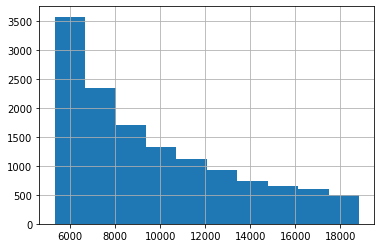

In [67]:
Filtering = Cut_numbered[(Cut_numbered['price'] > 5324.25)]
Filtering['price'].hist()

In [63]:
"""There are a lot of the values in the first part. """

(13485, 10)

Our dataset is really big and the outliers are really far apart from the rest of the values. To see this more clearly we will use a boxplot, which plots the median, 25th and 75th quartile, the maximum and minimum, as well as any outliers.

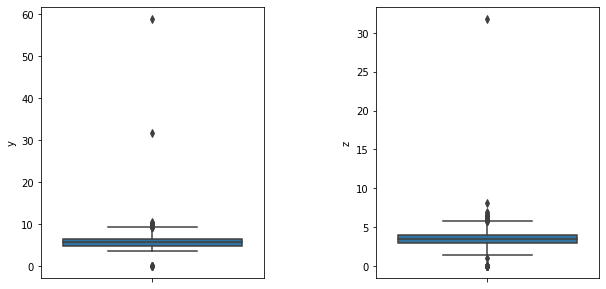

In [24]:
#Run this code
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=diamonds.y, ax=ax[0])
sns.boxplot(y=diamonds.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

Now we can see that all the values are within an acceptable range, but we have 2 big outliers in y and 1 in z. Now we know that our max values for y should be around 10 and the values for z should be around 6, so let's filter our dataset to find values for z higher than 10 in it.


In [80]:
Filter2 = Cut_numbered[(Cut_numbered['y'] < 10) & (Cut_numbered['z'] < 6)]

Now that we have found the outlier, let's use the function we defined earlier to correct this value. First, we need to change the value to 0 (because that's how we defined the function before) and then we will apply it.

**Apply `calculate_z` for the row with the outlier**

In [107]:
change1 = Cut_numbered['y'].replace(58.9, 0)
change2 = change1['z'].replace(31.8, 0)


Let's check if we actually corrected the outlier.

In [105]:
diamonds.loc[48410]

carat           0.72
cut        Very Good
color              H
clarity          SI2
depth           62.9
table             57
price           1970
x               5.64
y               5.68
z               3.56
Name: 48410, dtype: object

Now let's do the same for `y`. First, let's filter the DataFrame to find the outliers. We said that the maximum values should be around 10, so let's check what are the values above 10.

**Check the values greater than 10 in the `y` column** 

In [28]:
###already done in z. 

We can clearly see that the 31.8 in row 49189 is an outlier for the y value. Also, we can see that the 58.9 value for `y` in row 24067 is actually its depth, so it was a mistake when they introduced the data. Let's create a function to fix these outliers.

**Create a function named `calculate_y` to calculate `y` using `z` and `x` the same way you did above**

In [110]:
def calculate_y(row):
    change = iloc[48410]
    -((change.iloc[:,8])/(change.iloc[:,5]/100)) + (2* change.iloc[:,10])
    return ['y']

We will check the rows that had an outlier in `y`, to check that the values were changed.

**Check those rows and comment what you see**

In [30]:
""""This outlier influenced the values quite a bit for such a big dataset"""

Now that we have corrected or dropped all of our outliers, lets plot another box plot to double check.

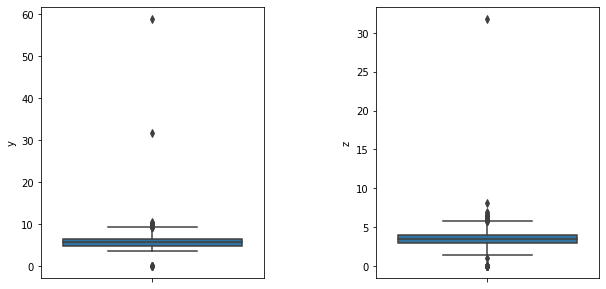

In [111]:
#Run this code
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=diamonds.y, ax=ax[0])
sns.boxplot(y=diamonds.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

**What do you think? Are these values more reasonable?**


In [32]:
""""The look more reasonable, and are better to make estimations from but they don't take in account the real values""""

**Once you are happy with your cleaning, save the cleaned data and continue to csv. Your new csv should be named ``diamonds_clean.csv``**

In [112]:
Cut_numbered.to_csv('Cut_numbered.csv', index=False)